# ============================================
# 1. Relevant Data Source, Methods, Tools for Collection
# ============================================

#### Dataset: IBM HR Analytics Employee Attrition
#### Source: Kaggle - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
#### Method: Manual download
#### Tools: Python, Pandas, Jupyter Notebook

#### 1a. Import libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder

In [59]:
# Set display options
pd.set_option('display.max_columns', None)

In [60]:
# Create directories for outputs
os.makedirs("output", exist_ok=True)

### 1b. Data Collection

In [61]:
data = ("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Load the dataset
df = pd.read_csv(data)


### 1c. Initial Exploration

In [62]:
# Display first 5 rows
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [63]:
# Display last 5 rows
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [64]:
# Basic information
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

In [65]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# ============================================
# 2. Steps Taken to Clean and Preprocess Data
# ============================================

In [66]:
# Show missing values
missing = df.isnull().sum()
# print("Missing values:\n", missing[missing > 0])

missing

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [67]:
# Check duplicates
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [68]:
# Drop constant or non-informative columns
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df.drop(columns=drop_cols, inplace=True)

In [69]:
# Confirm dropped
print("Columns after drop:", df.columns.tolist())

df.shape

Columns after drop: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


(1470, 31)

# ============================================
# 3. Transformations Applied and Feature Engineering
# ============================================

### 3a. Encode Target Variable

In [70]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

# Check target balance
print("Attrition value counts:\n", df['Attrition'].value_counts())

Attrition value counts:
 Attrition
0    1233
1     237
Name: count, dtype: int64


### 3b. Encode Categorical Variables

In [71]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [72]:
# Label encode each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### 3c. Feature Engineering

In [73]:
# TenureBucket:  categorise YearsAtCompany
df['TenureBucket'] = pd.cut(df['YearsAtCompany'],
                            bins=[-1,2,5,10,20,40],
                            labels=['<2','2-5','5-10','10-20','20+'])

# IncomePerJobLevel: MonthlyIncome / JobLevel
df['IncomePerJobLevel'] = df['MonthlyIncome'] / df['JobLevel']

# Preview engineered features
print(df[['YearsAtCompany','TenureBucket','MonthlyIncome','JobLevel','IncomePerJobLevel']].head())



   YearsAtCompany TenureBucket  MonthlyIncome  JobLevel  IncomePerJobLevel
0               6         5-10           5993         2             2996.5
1              10         5-10           5130         2             2565.0
2               0           <2           2090         1             2090.0
3               8         5-10           2909         1             2909.0
4               2           <2           3468         1             3468.0


# ============================================
# 4. Data Combination from Sources & Data Integrity
# ============================================


### Single dataset used – no merging required
### Integrity checks: consistent formats and reasonable value ranges


In [74]:
# Final Data Check

print("Final dataset shape after cleaning and transformation:", df.shape)
print(df.head())

Final dataset shape after cleaning and transformation: (1470, 33)
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

  

# ============================================
# 5. Data Quality Assessment, Bias, and Ethics
# ============================================

In [75]:
# Check class balance
print("Attrition value counts:\n", df['Attrition'].value_counts())

Attrition value counts:
 Attrition
0    1233
1     237
Name: count, dtype: int64


In [76]:
# Check numeric columns for outliers (IQR method)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")


Age: 0 outliers
Attrition: 237 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 226 outliers
RelationshipSatisfaction: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers
IncomePerJobLevel: 0 outliers


# 6. Bias & Ethics Consideration:
### - Dataset is from one company only – potential organisational bias
### - Ethical use: anonymised data with no personally identifiable information

# ============================================
# 7. Save Final Cleaned Dataset
# ============================================

In [80]:
df.to_csv("output/HR_Attrition_Cleaned.csv", index=False)
print("Cleaned dataset saved as HR_Attrition_Cleaned.csv")


Cleaned dataset saved as HR_Attrition_Cleaned.csv


# ============================================
# 7. Basic EDA Visualisations
# ============================================

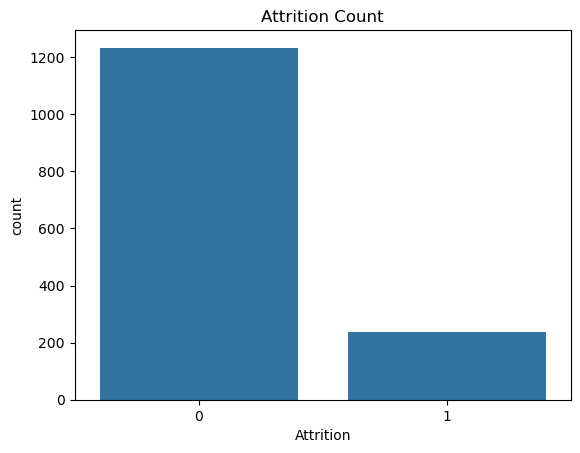

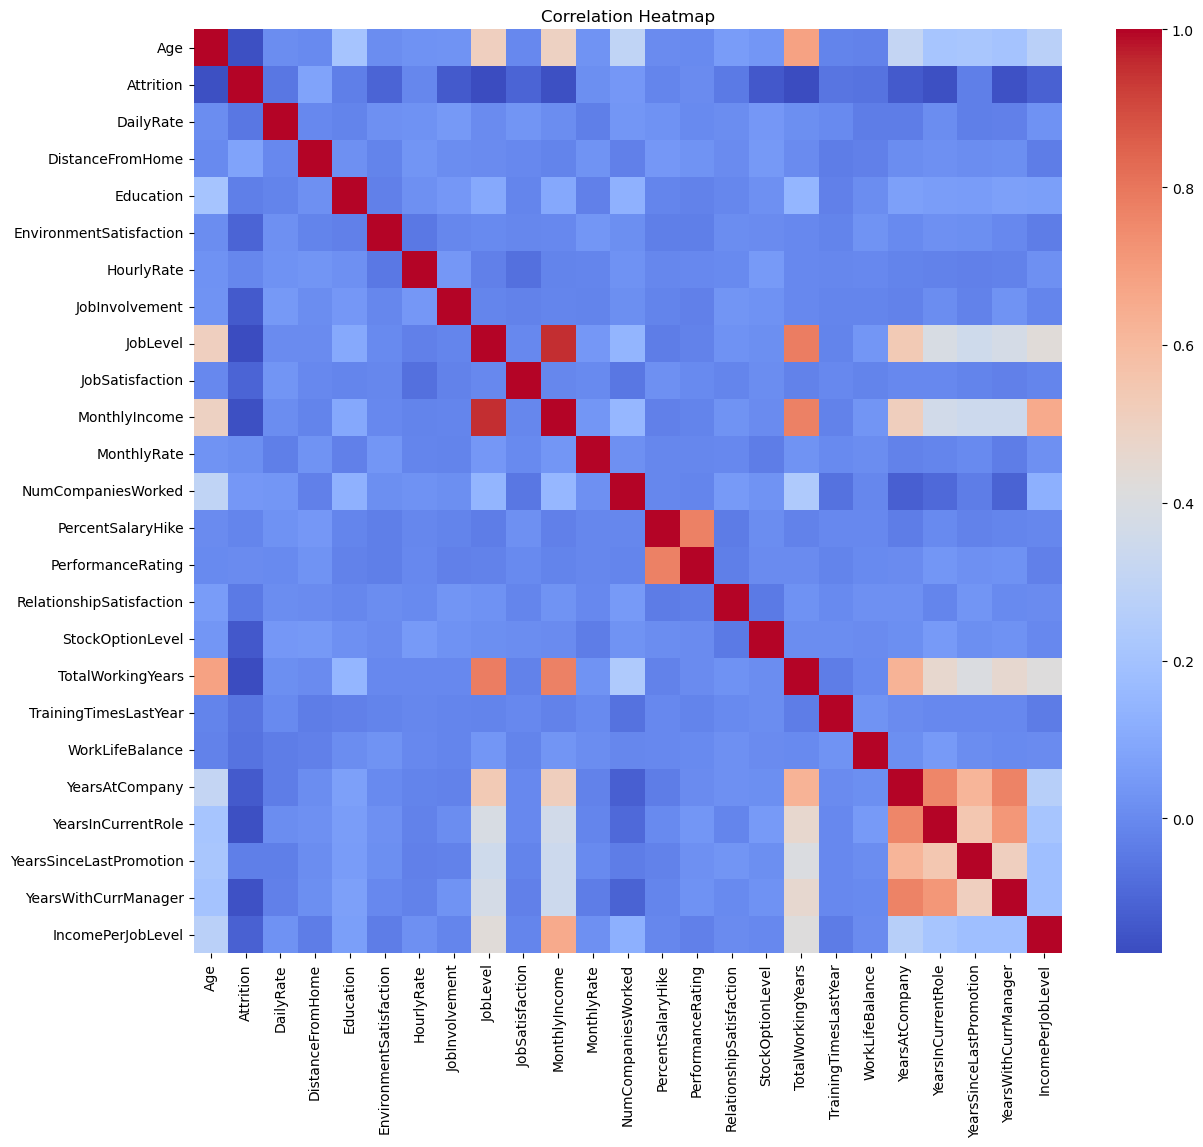

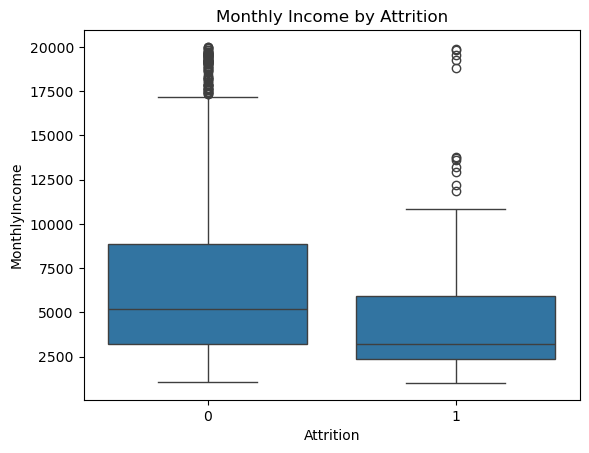

In [81]:
# Attrition count plot
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.savefig("output/Attrition_Count.png")  # save the plot
plt.show()

# Correlation heatmap
plt.figure(figsize=(14,12))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.savefig("output/Correlation_Heatmap.png")  # save the plot
plt.show()

# Boxplot for MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition')
plt.savefig("output/MonthlyIncome_by_Attrition.png")  # save the plot
plt.show()
